In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import re
import os

In [105]:
house_data = pd.read_csv('house_data_clean_no_coordinates.csv')

In [106]:
house_data.describe()

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,id,price,Biarea,Tomtarea,lat,lon
count,22434.000000,2.243400e+04,2.243400e+04,22434.000000,2.243400e+04,22434.000000,22434.000000,2.243400e+04,22434.000000,2.243400e+04,22434.000000,22434.00000,22434.000000,22434.000000
mean,4.977891,3.175655e+03,2.654204e+06,216.766604,8.741867e+10,18589.651467,29461.822279,2.051977e+05,528051.927209,2.881532e+06,21.224035,1065.54141,57.894742,12.183183
std,4.191378,1.642644e+05,6.213439e+05,268.321613,1.308051e+13,15257.182467,9696.504115,2.810909e+05,259348.711121,5.456841e+05,43.502880,6111.72088,0.304406,0.535244
min,3.000000,0.000000e+00,0.000000e+00,38.000000,0.000000e+00,0.000000,8803.000000,-5.225000e+06,313.000000,2.000050e+06,0.000000,0.00000,57.330030,10.991294
25%,3.000000,0.000000e+00,2.200000e+06,85.000000,1.954000e+03,4440.000000,22115.000000,0.000000e+00,307907.500000,2.415000e+06,0.000000,0.00000,57.695557,11.926365
50%,4.000000,0.000000e+00,2.595000e+06,115.000000,1.971000e+03,19437.000000,28313.000000,2.000000e+05,545008.500000,2.810000e+06,0.000000,191.00000,57.747187,12.012291
75%,5.000000,4.387000e+03,3.000000e+06,151.000000,1.992000e+03,31300.750000,35487.750000,3.800000e+05,757418.250000,3.325000e+06,30.000000,938.00000,57.991506,12.291706
max,75.000000,2.460250e+07,8.240000e+06,2685.000000,1.959196e+15,405696.000000,61000.000000,9.950000e+05,939070.000000,3.999500e+06,1535.000000,338321.00000,59.099301,14.612577


In [107]:
house_data.dtypes

Antal rum                float64
Avgift/månad             float64
Begärt pris              float64
Boarea                   float64
Byggår                   float64
Driftskostnad            float64
Förening                  object
Pris per kvadratmeter    float64
Prisutveckling           float64
address                   object
coordinate                object
id                       float64
map_url                   object
price                    float64
sale_date                 object
type                      object
url                       object
Biarea                   float64
Tomtarea                 float64
lat                      float64
lon                      float64
dtype: object

In [108]:
house_data.head()

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Förening,Pris per kvadratmeter,Prisutveckling,address,...,id,map_url,price,sale_date,type,url,Biarea,Tomtarea,lat,lon
0,4.0,5604.0,2475000.0,103.0,2008.0,9600.0,Brf Höjdpunkten,24757.0,75000.0,Björkhagegatan 6,...,938778.0,https:maps.googleapis.commapsapijs?libraries=g...,2550000.0,2019-01-28,bostadsratt,saldabostadsratt-4-stadsskogen-alingsas-kommun...,0.0,0.0,57.922913,12.502651
1,7.0,0.0,1995000.0,175.0,1958.0,52400.0,0,13029.0,285000.0,Ekebackevägen 1,...,938744.0,https:maps.googleapis.commapsapijs?libraries=g...,2280000.0,2019-01-28,villa,saldavilla-7-lilla-foss-munkedals-kommun-ekeba...,145.0,1483.0,58.472414,11.669846
2,5.0,0.0,3495000.0,103.0,1979.0,38865.0,0,32330.0,-165000.0,Agnebäcksvägen 24,...,938717.0,https:maps.googleapis.commapsapijs?libraries=g...,3330000.0,2019-01-28,radhus,saldaradhus-5-landvetter-harryda-kommun-agneba...,0.0,201.0,57.690137,12.208904
3,5.0,0.0,2275000.0,137.0,1980.0,36000.0,0,16606.0,0.0,Tvåöringsgränd 12,...,938962.0,https:maps.googleapis.commapsapijs?libraries=g...,2275000.0,2019-01-28,villa,saldavilla-5-helenedal-uddevalla-kommun-tvaori...,21.0,346.0,58.377189,11.952472
4,3.0,4492.0,2650000.0,70.0,2016.0,0.0,BRF Lergöken,40000.0,150000.0,Lergöksgatan 15,...,938923.0,https:maps.googleapis.commapsapijs?libraries=g...,2800000.0,2019-01-28,bostadsratt,saldabostadsratt-3-frolunda-goteborgs-kommun-l...,0.0,0.0,57.657389,11.900349


In [109]:
mask = (house_data['address'].str.contains('jonsered'))
house_data.loc[mask]

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Förening,Pris per kvadratmeter,Prisutveckling,address,...,id,map_url,price,sale_date,type,url,Biarea,Tomtarea,lat,lon


In [110]:
house_data['Prisutveckling_pct'] = house_data['Prisutveckling'] / house_data['price'] * 100

/Users/martinalexandersson/Dev/hemnet/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1351db128>,
      dtype=object)

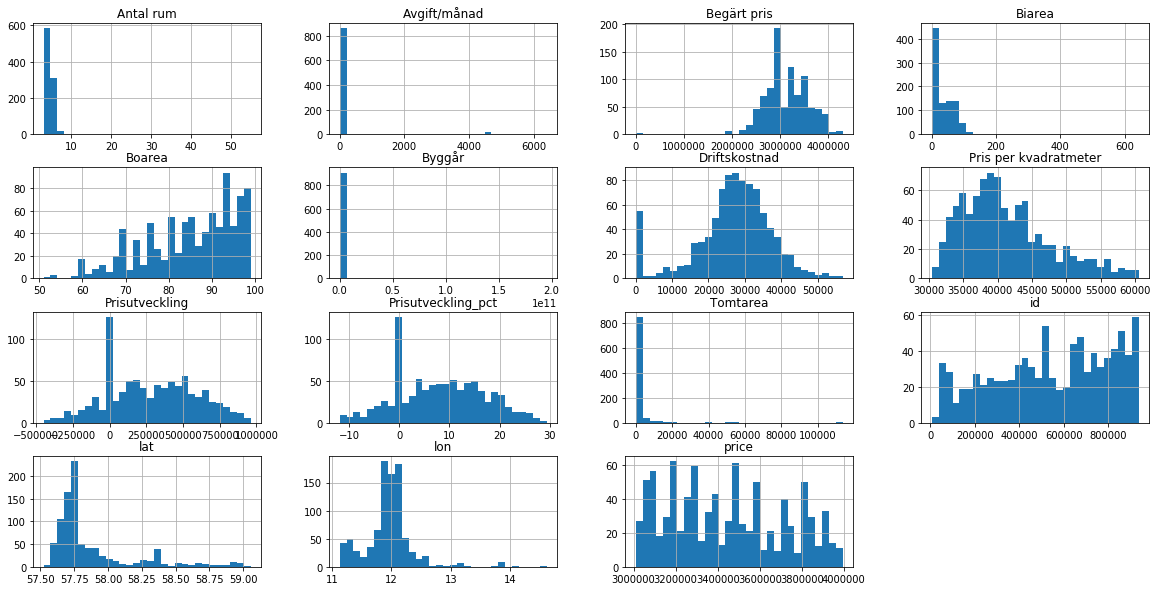

In [111]:
price_max = house_data['Prisutveckling_pct'].quantile(0.99)
price_min = house_data['Prisutveckling_pct'].quantile(0.01)

mask = ((house_data['Prisutveckling_pct'] > price_min) & 
        (house_data['Prisutveckling_pct'] < price_max) &
        (house_data['price'] > 3*10**6) &
        
        ((house_data['type'] == 'villa') | (house_data['type'] == 'radhus')) &
        (house_data['Boarea'] < 100) & (house_data['Boarea'] > 50)
       
       )

house_data_ = house_data.loc[mask].copy()
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
house_data_.hist(bins = 30,ax = ax)

In [112]:
4500000 / 70

64285.71428571428

In [113]:
house_data_.columns

Index(['Antal rum', 'Avgift/månad', 'Begärt pris', 'Boarea', 'Byggår',
       'Driftskostnad', 'Förening', 'Pris per kvadratmeter', 'Prisutveckling',
       'address', 'coordinate', 'id', 'map_url', 'price', 'sale_date', 'type',
       'url', 'Biarea', 'Tomtarea', 'lat', 'lon', 'Prisutveckling_pct'],
      dtype='object')

In [114]:
house_data_['temp'] = house_data_['price'] / house_data_['Boarea']

In [115]:
house_data_[['price','Begärt pris','Pris per kvadratmeter','temp','Boarea','Biarea']].head()

,price,Begärt pris,Pris per kvadratmeter,temp,Boarea,Biarea
34,3980000.0,3395000.0,42340.0,42340.425532,94.0,12.0
76,3260000.0,3250000.0,33958.0,33958.333333,96.0,0.0
86,3170000.0,2950000.0,44028.0,44027.777778,72.0,0.0
98,3200000.0,2895000.0,38095.0,38095.238095,84.0,0.0
135,3855000.0,3695000.0,55071.0,55071.428571,70.0,35.0


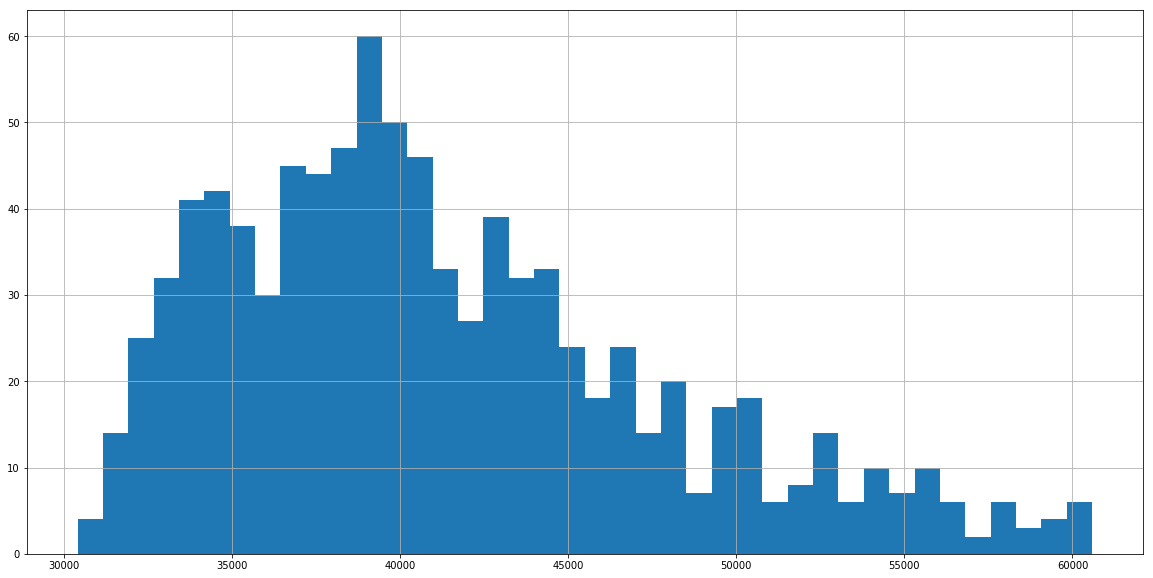

In [116]:
house_data_['Pris per kvadratmeter'].hist(bins = 40)

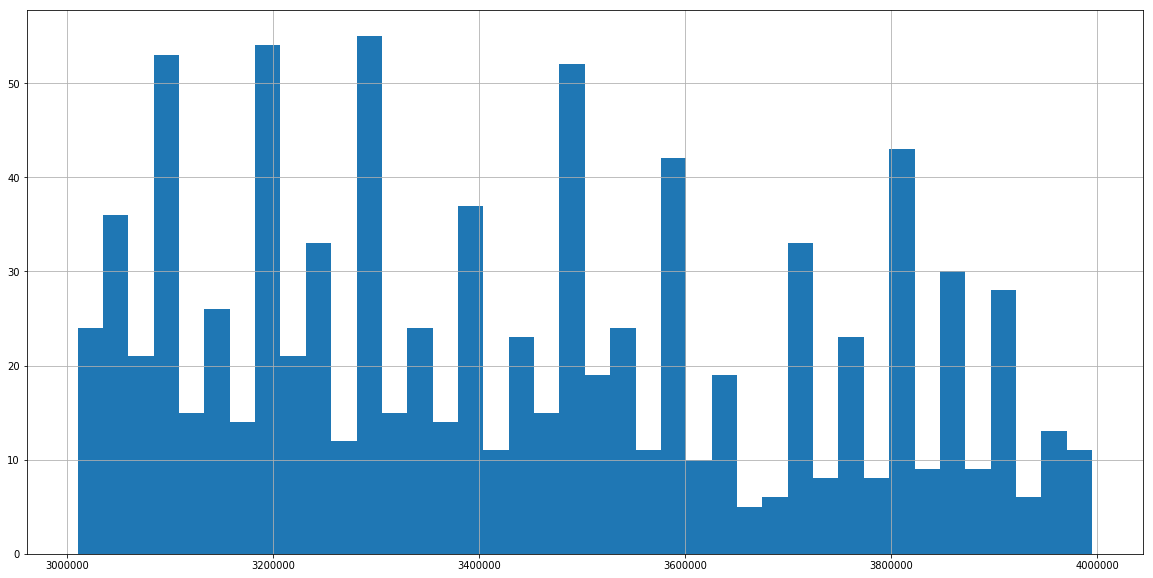

In [117]:
house_data_['price'].hist(bins = 40)

In [118]:
3000000 / 72

41666.666666666664

In [119]:
4500000 / 72

62500.0

In [69]:
house_data_['type'].unique()

array(['radhus', 'villa'], dtype=object)

In [97]:
4600000/(1.23)

3739837.398373984